In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import pingouin as pg
%matplotlib inline

In [3]:
#get numpy version
#np.version.version

'1.19.5'

In [4]:
#Get pandas verion
#pd.__version__

'1.0.1'

In [5]:
#Get SNS Version
#sns.__version__

'0.10.0'

In [10]:
import nltk
import sklearn

print('The nltk version is {}.'.format(nltk.__version__))
print('The scikit-learn version is {}.'.format(sklearn.__version__))

The nltk version is 3.4.5.
The scikit-learn version is 0.24.1.


In [2]:
train = pd.read_csv("F:\Data\Experimental/train.csv")
test = pd.read_csv("F:\Data\Experimental/test.csv")

In [3]:
train.head()

,profile pic,nums/length username,fullname words,nums/length fullname,name==username,description length,external URL,private,posts,followers,follows,fake
0,1,0.27,0,0.0,0,53,0,0,32,1000,955,0
1,1,0.00,2,0.0,0,44,0,0,286,2740,533,0
2,1,0.10,2,0.0,0,0,0,1,13,159,98,0
3,1,0.00,1,0.0,0,82,0,0,679,414,651,0
4,1,0.00,2,0.0,0,0,0,1,6,151,126,0


In [116]:
p1f1 = train.loc[(train['profile pic'] == 1 ) & (train['fake']==1),'fake'].count()

In [117]:
p1f0 = train.loc[(train['profile pic'] == 1 ) & (train['fake']==0),'fake'].count()

In [118]:
p0f1 = train.loc[(train['profile pic'] == 0 ) & (train['fake']==1),'fake'].count()

In [119]:
p0f0 = train.loc[(train['profile pic'] == 0) & (train['fake']==0),'fake'].count()

In [120]:
print(p1f1)
print(p1f0)
print(p0f1)
print(p0f0)

118
286
170
2


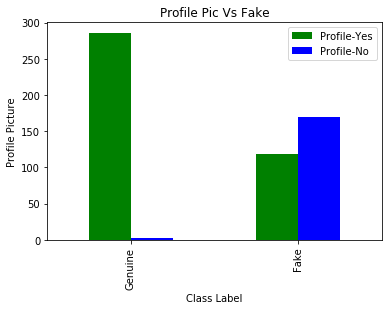

In [121]:
plotdata = pd.DataFrame({
    "Profile-Yes":[286, 118],
    "Profile-No":[2, 170]
    }, 
    index=["Genuine", "Fake"]
)
plotdata.plot(kind="bar", color=['green', 'blue'])
plt.title("Profile Pic Vs Fake")
plt.xlabel("Class Label")
plt.ylabel("Profile Picture")
plt.savefig('ProfileVsfake')

In [122]:
u1f1 = train.loc[(train['name==username'] == 1 ) & (train['fake']==1),'fake'].count()

In [123]:
u1f0 = train.loc[(train['name==username'] == 1 ) & (train['fake']==0),'fake'].count()

In [124]:
u0f1 = train.loc[(train['name==username'] == 0 ) & (train['fake']==1),'fake'].count()

In [125]:
u0f0 = train.loc[(train['name==username'] == 0 ) & (train['fake']==0),'fake'].count()

In [126]:
print(u1f1)
print(u1f0)
print(u0f1)
print(u0f0)

19
1
269
287


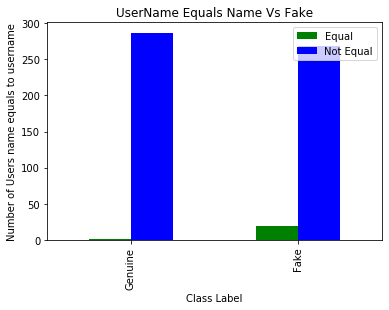

In [133]:
plotdata = pd.DataFrame({
    "Equal":[1, 19],
    "Not Equal":[287, 269]
    }, 
    index=["Genuine", "Fake"]
)
plotdata.plot(kind="bar", color=['green', 'blue'])
plt.title("UserName Equals Name Vs Fake")
plt.xlabel("Class Label")
plt.ylabel("Number of Users name equals to username")
plt.savefig('unVsfake')

In [128]:
e1f1 = train.loc[(train['external URL'] == 1 ) & (train['fake']==1),'fake'].count()

In [129]:
e1f0 = train.loc[(train['external URL'] == 1 ) & (train['fake']==0),'fake'].count()

In [130]:
e0f1 = train.loc[(train['external URL'] == 0 ) & (train['fake']==1),'fake'].count()

In [131]:
e0f0 = train.loc[(train['external URL'] == 0 ) & (train['fake']==0),'fake'].count()

In [132]:
print(e1f1)
print(e1f0)
print(e0f1)
print(e0f0)

0
67
288
221


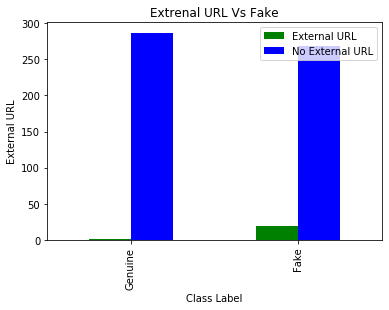

In [142]:
plotdata = pd.DataFrame({
    "External URL":[1, 19],
    "No External URL":[287, 269]
    }, 
    index=["Genuine", "Fake"]
)
plotdata.plot(kind="bar", color=['green', 'blue'])
plt.title("Extrenal URL Vs Fake")
plt.xlabel("Class Label")
plt.ylabel("External URL")
plt.savefig('eURLVsfake')

In [135]:
p1f1 = train.loc[(train['private'] == 1 ) & (train['fake']==1),'fake'].count()

In [136]:
p1f0 = train.loc[(train['private'] == 1 ) & (train['fake']==0),'fake'].count()

In [137]:
p0f1 = train.loc[(train['private'] == 0 ) & (train['fake']==1),'fake'].count()

In [138]:
p0f0 = train.loc[(train['private'] == 0) & (train['fake']==0),'fake'].count()

In [139]:
print(p1f1)
print(p1f0)
print(p0f1)
print(p0f0)

106
114
182
174


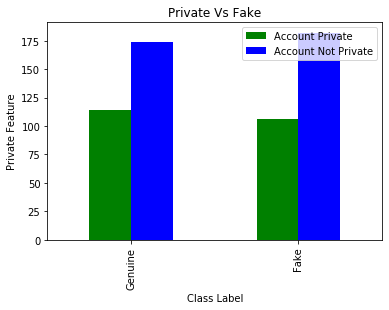

In [140]:
plotdata = pd.DataFrame({
    "Account Private":[114, 106],
    "Account Not Private":[174, 182]
    }, 
    index=["Genuine", "Fake"]
)
plotdata.plot(kind="bar", color=['green', 'blue'])
plt.title("Private Vs Fake")
plt.xlabel("Class Label")
plt.ylabel("Private Feature")
plt.savefig('privateLVsfake')

In [3]:
train.tail()

,profile pic,nums/length username,fullname words,nums/length fullname,name==username,description length,external URL,private,posts,followers,follows,fake
571,1,0.55,1,0.44,0,0,0,0,33,166,596,1
572,1,0.38,1,0.33,0,21,0,0,44,66,75,1
573,1,0.57,2,0.00,0,0,0,0,4,96,339,1
574,1,0.57,1,0.00,0,11,0,0,0,57,73,1
575,1,0.27,1,0.00,0,0,0,0,2,150,487,1


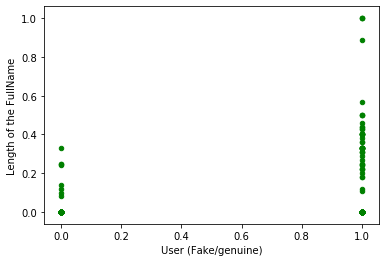

In [153]:
dat1 = train['nums/length fullname']
label = train.fake
df = pd.DataFrame({'user':label,'Length of the FullName': dat1})
ax = df.plot.scatter(x='user', y='Length of the FullName', rot=0,color="green")
plt.xlabel("User (Fake/genuine)")
plt.ylabel("Length of the FullName")
plt.savefig('FulllengthVsFake')
plt.show()

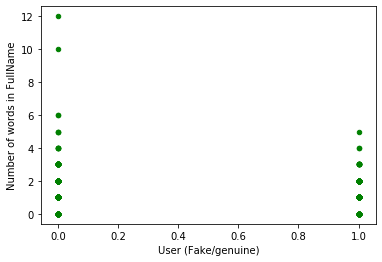

In [154]:
dat1 = train['fullname words']
label = train.fake
df = pd.DataFrame({'user':label,'Number of words in FullName': dat1})
ax = df.plot.scatter(x='user', y='Number of words in FullName', rot=0,color="green")
plt.xlabel("User (Fake/genuine)")
plt.ylabel("Number of words in FullName")
plt.savefig('fullwordVsFake')
plt.show()

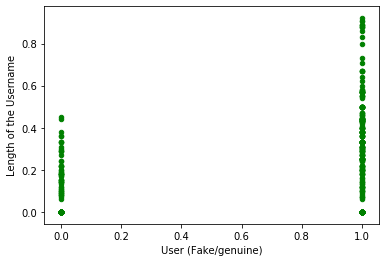

In [152]:
dat1 = train['nums/length username']
label = train.fake
df = pd.DataFrame({'user':label,'Length of the Username': dat1})
ax = df.plot.scatter(x='user', y='Length of the Username', rot=0,color="green")
plt.xlabel("User (Fake/genuine)")
plt.ylabel("Length of the Username")
plt.savefig('UlengthVsFake')
plt.show()

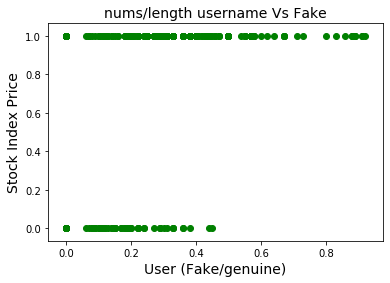

In [144]:
df = pd.DataFrame(train,columns=['nums/length username','fake'])
  
plt.scatter(df['nums/length username'], df['fake'], color='green')
plt.title('nums/length username Vs Fake', fontsize=14)
plt.xlabel('User (Fake/genuine)', fontsize=14)
plt.ylabel('Stock Index Price', fontsize=14)
plt.show()

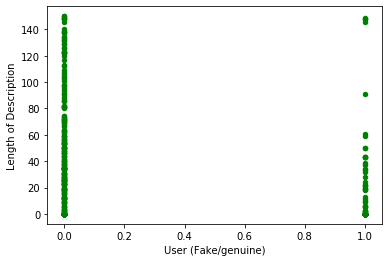

In [148]:
dat1 = train['description length']
label = train.fake
df = pd.DataFrame({'user':label,'Length of Description': dat1})
ax = df.plot.scatter(x='user', y='Length of Description', rot=0,color="green")
plt.xlabel("User (Fake/genuine)")
plt.ylabel("Length of Description")
plt.savefig('lengthdescVsFake')
plt.show()

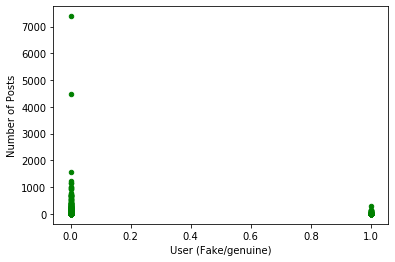

In [149]:
dat1 = train['posts']
label = train.fake
df = pd.DataFrame({'user':label,'posts': dat1})
ax = df.plot.scatter(x='user', y='posts', rot=0,color="green")
plt.xlabel("User (Fake/genuine)")
plt.ylabel("Number of Posts")
plt.savefig('postVsFake')
plt.show()

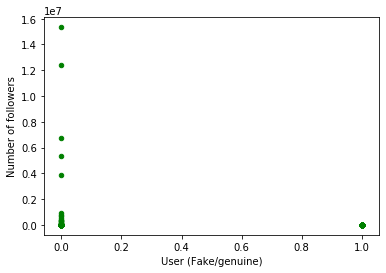

In [150]:
followers = train.followers
label = train.fake
df = pd.DataFrame({'user':label,'Followers': followers})
ax = df.plot.scatter(x='user', y='Followers',color="green", rot=0)
plt.xlabel("User (Fake/genuine)")
plt.ylabel("Number of followers")
plt.savefig('FollowersVsFake')
plt.show()

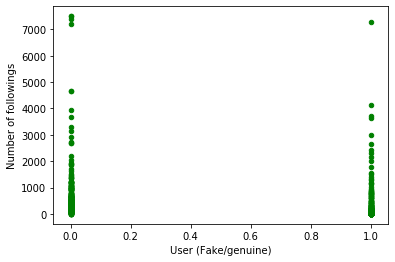

In [151]:
follows = train.follows
label = train.fake
df = pd.DataFrame({'user':label,'Followings': follows})
ax = df.plot.scatter(x='user', y='Followings', rot=0,color="green")
plt.xlabel("User (Fake/genuine)")
plt.ylabel("Number of followings")
plt.savefig('FollowsVsFake')
plt.show()

In [7]:
print('Data Preprocessing - Missing Values')

Data Preprocessing - Missing Values


In [8]:
train.isna().sum()

profile pic             0
nums/length username    0
fullname words          0
nums/length fullname    0
name==username          0
description length      0
external URL            0
private                 0
posts                   0
followers               0
follows                 0
fake                    0
dtype: int64

In [9]:
test.isna().sum()

profile pic             0
nums/length username    0
fullname words          0
nums/length fullname    0
name==username          0
description length      0
external URL            0
private                 0
#posts                  0
#followers              0
#follows                0
fake                    0
dtype: int64

In [10]:
print('Data Preprocessing - Categorical Values')

Data Preprocessing - Categorical Values


In [11]:
print('Data Preprocessing - Correlation')

Data Preprocessing - Correlation


In [12]:
def plotCorrelationMatrix(df, graphWidth):
    filename = df.dataframeName
    df = df.dropna('columns') # drop columns with NaN
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    if df.shape[1] < 2:
        print(f'No correlation plots shown: The number of non-NaN or constant columns ({df.shape[1]}) is less than 2')
        return
    corr = df.corr()
    plt.figure(num=None, figsize=(graphWidth, graphWidth), dpi=80, facecolor='w', edgecolor='k')
    corrMat = plt.matshow(corr, fignum = 1)
    plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
    plt.yticks(range(len(corr.columns)), corr.columns)
    plt.gca().xaxis.tick_bottom()
    plt.colorbar(corrMat)
    plt.title(f'Correlation Matrix for {filename}', fontsize=15)
    plt.show()

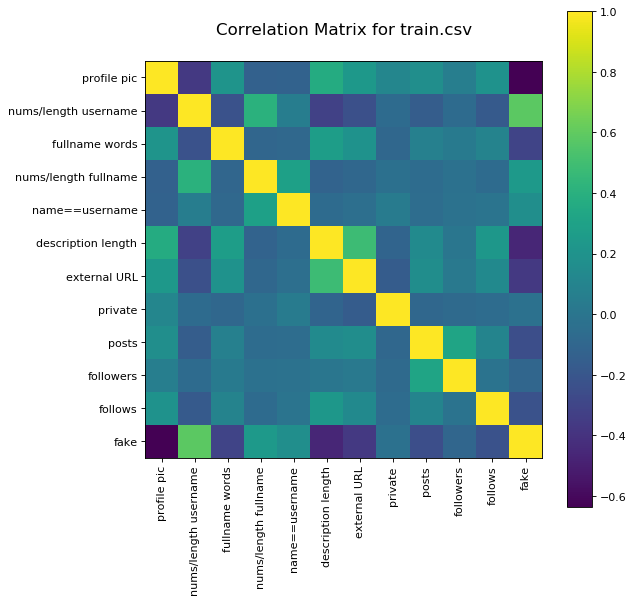

In [13]:
train.dataframeName = 'train.csv'
plotCorrelationMatrix(train, 8)

In [14]:
train.rcorr(stars=False)

,profile pic,nums/length username,fullname words,nums/length fullname,name==username,description length,external URL,private,posts,followers,follows,fake
profile pic,-,0.000,0.000,0.002,0.003,0.000,0.000,0.006,0.000,0.143,0.000,0.000
nums/length username,-0.364,-,0.000,0.000,0.173,0.000,0.000,0.127,0.000,0.132,0.000,0.000
fullname words,0.213,-0.225,-,0.024,0.047,0.000,0.000,0.033,0.079,0.426,0.023,0.000
nums/length fullname,-0.132,0.409,-0.094,-,0.000,0.005,0.033,0.472,0.167,0.517,0.103,0.000
name==username,-0.125,0.057,-0.083,0.291,-,0.120,0.347,0.27,0.233,0.671,0.819,0.000
description length,0.368,-0.321,0.273,-0.118,-0.065,-,0.000,0.008,0.000,0.887,0.000,0.000
external URL,0.237,-0.237,0.197,-0.089,-0.039,0.482,-,0.000,0.000,0.515,0.001,0.000
private,0.115,-0.064,-0.089,-0.03,0.046,-0.11,-0.163,-,0.036,0.078,0.168,0.494
posts,0.17,-0.157,0.073,-0.058,-0.05,0.145,0.165,-0.087,-,0.000,0.018,0.000
followers,0.061,-0.063,0.033,-0.027,-0.018,0.006,0.027,-0.073,0.321,-,0.791,0.025


In [15]:
train['fake'].value_counts()

1    288
0    288
Name: fake, dtype: int64

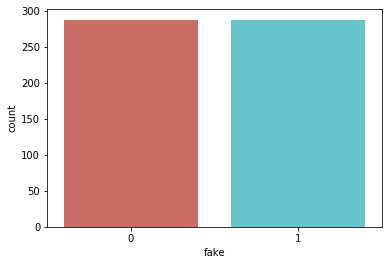

In [33]:
sns.countplot(x='fake', data = train, palette='hls')
plt.savefig('TraindataBalanced')
plt.show()

In [34]:
test['fake'].value_counts()


1    60
0    60
Name: fake, dtype: int64

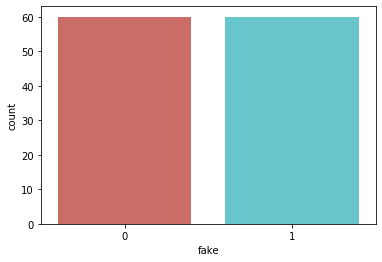

In [35]:
sns.countplot(x='fake', data = test, palette='hls')
plt.savefig('TestdataBalanced')
plt.show()

In [4]:
train_Y=train.fake
train_Y=pd.DataFrame(train_Y)

In [5]:
train_X= train.drop(columns='fake')

In [6]:
test_Y=test.fake
test_Y=pd.DataFrame(test_Y)

In [7]:
test_X= test.drop(columns='fake')

In [8]:
print('Training Features Shape:', train_X.shape)
print('Training Labels Shape:', train_Y.shape)
print('Testing Features Shape:', test_X.shape)
print('Testing Labels Shape:', test_Y.shape)

Training Features Shape: (576, 11)
Training Labels Shape: (576, 1)
Testing Features Shape: (120, 11)
Testing Labels Shape: (120, 1)


In [9]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(solver='lbfgs')
rfe = RFE(model, 5)
fit = rfe.fit(train_X, train_Y)
print("Num Features: %d" % fit.n_features_)
print("Selected Features: %s" % fit.support_)
print("Feature Ranking: %s" % fit.ranking_)

C:\Users\USER\AppData\Roaming\Python\Python37\site-packages\sklearn\utils\validation.py:72: FutureWarning: Pass n_features_to_select=5 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  "will result in an error", FutureWarning)
C:\Users\USER\AppData\Roaming\Python\Python37\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\USER\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit

Num Features: 5
Selected Features: [ True  True False  True  True False  True False False False False]
Feature Ranking: [1 1 2 1 1 5 1 3 4 6 7]


In [10]:
import statsmodels.api as sm
logit_model=sm.Logit(train_Y,train_X)
result=logit_model.fit()
print(result.summary2())

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\discrete\discrete_model.py:1747: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


         Current function value: 0.235982
         Iterations: 35
                                 Results: Logit
Model:                   Logit                 Pseudo R-squared:      0.660      
Dependent Variable:      fake                  AIC:                   293.8516   
Date:                    2021-04-08 18:53      BIC:                   341.7688   
No. Observations:        576                   Log-Likelihood:        -135.93    
Df Model:                10                    LL-Null:               -399.25    
Df Residuals:            565                   LLR p-value:           8.8501e-107
Converged:               0.0000                Scale:                 1.0000     
No. Iterations:          35.0000                                                 
---------------------------------------------------------------------------------
                      Coef.     Std.Err.     z    P>|z|     [0.025       0.975]  
------------------------------------------------------------------

In [11]:
logreg = LogisticRegression(class_weight = 'balanced')
logreg.fit(train_X,train_Y)

C:\Users\USER\AppData\Roaming\Python\Python37\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\USER\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(class_weight='balanced')

In [12]:
predict_y = logreg.predict(test_X)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(test_X, test_Y)))

Accuracy of logistic regression classifier on test set: 0.91


In [13]:
from sklearn.metrics import classification_report
print(classification_report(test_Y, predict_y))

              precision    recall  f1-score   support

           0       0.95      0.87      0.90        60
           1       0.88      0.95      0.91        60

    accuracy                           0.91       120
   macro avg       0.91      0.91      0.91       120
weighted avg       0.91      0.91      0.91       120



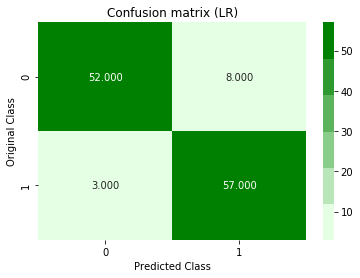

In [29]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
C = confusion_matrix(test_Y, predict_y)
labels = [0,1]
cmap=sns.light_palette("green")
sns.heatmap(C, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted Class')
plt.ylabel('Original Class')
plt.title("Confusion matrix (LR)")
plt.savefig('LRMatrix')

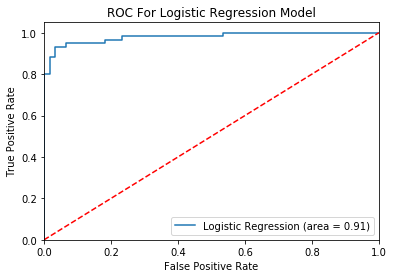

In [14]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(test_Y, logreg.predict(test_X))
fpr, tpr, thresholds = roc_curve(test_Y, logreg.predict_proba(test_X)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC For Logistic Regression Model')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [19]:
from sklearn import svm

clf = svm.SVC(kernel='linear') # Linear Kernel
clf.fit(train_X, train_Y)
#Predict the response for test dataset
y_pred = clf.predict(test_X)

C:\Users\USER\AppData\Roaming\Python\Python37\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


KeyboardInterrupt: 

In [ ]:
from sklearn import metrics

print("Accuracy:",metrics.accuracy_score(test_Y, y_pred))

In [38]:
# Model Precision: what percentage of positive tuples are labeled as such?
print("Precision:",metrics.precision_score(test_Y, y_pred))

# Model Recall: what percentage of positive tuples are labelled as such?
print("Recall:",metrics.recall_score(test_Y, y_pred))

Precision: 0.8852459016393442
Recall: 0.9


In [40]:
from sklearn.ensemble import RandomForestRegressor

regressor = RandomForestRegressor(n_estimators=20, random_state=0)
regressor.fit(train_X, train_Y)
y_pred = regressor.predict(test_X)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


In [41]:
print('Accuracy of Random Forest on test set: {:.2f}'.format(regressor.score(test_X, test_Y)))

Accuracy of Random Forest on test set: 0.77


In [20]:
from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB()
clf.fit(train_X,train_Y)

C:\Users\USER\AppData\Roaming\Python\Python37\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


MultinomialNB()

In [21]:
print('Accuracy of NB on test set: {:.2f}'.format(clf.score(test_X, test_Y)))

Accuracy of NB on test set: 0.53


In [22]:
from sklearn.metrics import classification_report
nbpredict_y = clf.predict(test_X)
print(classification_report(test_Y, nbpredict_y))

              precision    recall  f1-score   support

           0       0.64      0.12      0.20        60
           1       0.51      0.93      0.66        60

    accuracy                           0.53       120
   macro avg       0.58      0.53      0.43       120
weighted avg       0.58      0.53      0.43       120



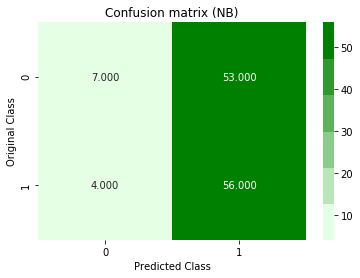

In [30]:
C = confusion_matrix(test_Y, nbpredict_y)
labels = [0,1]
cmap=sns.light_palette("green")
sns.heatmap(C, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted Class')
plt.ylabel('Original Class')
plt.title("Confusion matrix (NB)")
plt.savefig('NBMatrix')

In [24]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(train_X,train_Y)

C:\Users\USER\AppData\Roaming\Python\Python37\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier()

In [25]:
print('Accuracy of KNN on test set: {:.2f}'.format(knn.score(test_X, test_Y)))

Accuracy of KNN on test set: 0.84


In [26]:
knnpredict_y = knn.predict(test_X)
print(classification_report(test_Y, knnpredict_y))

              precision    recall  f1-score   support

           0       0.82      0.88      0.85        60
           1       0.87      0.80      0.83        60

    accuracy                           0.84       120
   macro avg       0.84      0.84      0.84       120
weighted avg       0.84      0.84      0.84       120



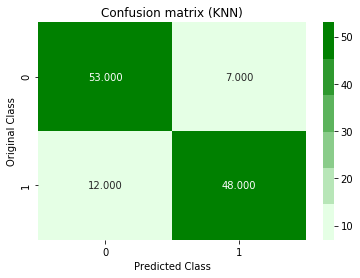

In [31]:
C = confusion_matrix(test_Y, knnpredict_y)
labels = [0,1]
cmap=sns.light_palette("green")
sns.heatmap(C, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted Class')
plt.ylabel('Original Class')
plt.title("Confusion matrix (KNN)")
plt.savefig('KNNMatrix')